# Results Visualization

In this notebook we are going to calculate and visualize the different continual learning metrics and graphs obtained after the training process of the different experiments carried out.

In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scienceplots

plt.style.use(['science', "no-latex"])

# mpl.rcParams.update(mpl.rcParamsDefault)
# mpl.rc('font',family='Times New Roman')


init_notebook_mode(connected=False)

In [4]:
results_path = "../final_results/results.csv"
df = pd.read_csv(results_path)
df.tail()

experiment_name experiment_type  \
380  mert95m_replay_cl_vocalsettech_scenario3              CL   
381  mert95m_replay_cl_vocalsettech_scenario3              CL   
382  mert95m_replay_cl_vocalsettech_scenario3              CL   
383  mert95m_replay_cl_vocalsettech_scenario3              CL   
384  mert95m_replay_cl_vocalsettech_scenario3              CL   

    experiment_subtype train_dataset_name  train_task_number  \
380             Replay       VocalSetTech                  0   
381             Replay       VocalSetTech                  1   
382             Replay       VocalSetTech                  2   
383             Replay       VocalSetTech                  3   
384             Replay       VocalSetTech                  4   

       train_task_name                                          task_name  \
380     spoken-breathy                                     spoken-breathy   
381   straight-inhaled                    spoken-breathy-straight-inhaled   
382   lip_trill-trillo   spoken-breathy-straight-inhaled-lip_trill-trillo   
383  vibrato-vocal_fry  spoken-breathy-straight-inhaled-lip_trill-tril...   
384         trill-belt  spoken-breathy-straight-inhaled-lip_trill-tril...   

     Accuracy  F1 Score  Precision    Recall  
380  1.000000  1.000000   1.000000  1.000000  
381  0.888889  0.879052   0.897140  0.876758  
382  0.661290  0.647384   0.751296  0.763956  
383  0.347222  0.211096   0.162125  0.398754  
384  0.273563  0.150911   0.100232  0.378000

In [48]:
def create_line_figure(df: pd.DataFrame, ax: plt.Axes, caption: str, position:float):
    unique_methods = df.experiment_subtype.unique()
    # Oracle
    df_oracle = df[df.experiment_subtype == "Oracle"]
    mean_accuracy = []
    max_accuracy = []
    min_accuracy = []
    for task_id in range(5):
        accuracy_oracle_task = df_oracle[df_oracle.train_task_number == task_id].Accuracy
        mean_accuracy.append(accuracy_oracle_task.mean() * 100)
        max_accuracy.append(accuracy_oracle_task.max() * 100)
        min_accuracy.append(accuracy_oracle_task.min() * 100)

    p = ax.axhline(y=mean_accuracy[-1], linestyle = "--")
    # print(p.get_color())

    # Rest of methods
    markers = [".", "^", "s", "p", "h", "X", "d"]
    colors = ["#0C5DA5", "#00B945", "#FF9500", "#FF2C00", "#9e9e9e", "#474747", "#845B97"]
    iter_markers = iter(markers)
    iter_colors = iter(colors)
    for method in unique_methods:
        if method in ["Oracle", "CosineCenter"]:
            continue
        elif method == "Finetuning":
            label = "Finetune"
        elif method == "L2Center":
            label = "PCC"
        else:
            label = method
        
        marker = next(iter_markers)
        color = next(iter_colors)
        mean_accuracy = []
        max_accuracy = []
        min_accuracy = []
        for task_id in range(5):
            accuracy_method_task = df[(df.experiment_subtype == method) & (df.train_task_number == task_id)].Accuracy
            mean_accuracy.append(accuracy_method_task.mean() * 100)
            max_accuracy.append(accuracy_method_task.max() * 100)
            min_accuracy.append(accuracy_method_task.min() * 100)
        
        p = ax.plot([1, 2, 3, 4, 5], mean_accuracy, marker=marker, label=label, linewidth=1.0, color=color)
        ax.fill_between([1, 2, 3, 4, 5], min_accuracy, max_accuracy, alpha=0.1, color=color)
        # print(p[-1].get_color())
        # print(color)
        
    ax.set_xticks([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], fontsize=12)
    ax.set_yticks(range(0, 110, 10), range(0, 110, 10), fontsize=12)
    ax.set_xlim(0.90, 5.1)
    ax.set_ylim(0, 102)
    ax.set_ylabel('Accuracy (%)', fontdict={"fontsize": 14})
    ax.set_xlabel('Sessions', fontdict={"fontsize": 14})
    ax.grid(linestyle='--', linewidth=0.5)
    plt.figtext(position[0], position[1], caption, wrap=True, horizontalalignment="center", fontdict={"fontsize": 18})


In [6]:
results_path = "../final_results/results_gtzan.csv"
df_gtzan = pd.read_csv(results_path)
df_gtzan['scenario'] = df_gtzan.experiment_name.str.split("_").apply(lambda x: x[-1])
df_gtzan.head()

experiment_name experiment_type experiment_subtype  \
0  mert95m_base_oracle_gtzan_scenario1        Baseline             Oracle   
1  mert95m_base_oracle_gtzan_scenario1        Baseline             Oracle   
2  mert95m_base_oracle_gtzan_scenario1        Baseline             Oracle   
3  mert95m_base_oracle_gtzan_scenario1        Baseline             Oracle   
4  mert95m_base_oracle_gtzan_scenario1        Baseline             Oracle   

  train_dataset_name  train_task_number  train_task_name  \
0              GTZAN                  0        metal-pop   
1              GTZAN                  1    country-disco   
2              GTZAN                  2      reggae-rock   
3              GTZAN                  3  blues-classical   
4              GTZAN                  4      hiphop-jazz   

                                           task_name  Accuracy  F1 Score  \
0                                          metal-pop  0.859649  0.859649   
1                            metal-pop-country-disco  0.853448  0.853448   
2                metal-pop-country-disco-reggae-rock  0.747126  0.747126   
3  metal-pop-country-disco-reggae-rock-blues-clas...  0.690678  0.690678   
4  metal-pop-country-disco-reggae-rock-blues-clas...  0.724138  0.724138   

   Precision    Recall   scenario  
0   0.859649  0.859649  scenario1  
1   0.853448  0.853448  scenario1  
2   0.747126  0.747126  scenario1  
3   0.690678  0.690678  scenario1  
4   0.724138  0.724138  scenario1

In [12]:
plt.figure()
ax = plt.gca()
create_line_figure(df_gtzan, ax)
# Configuration
plt.legend(bbox_to_anchor=(1.3, 1.02))
plt.show()

TypeError: create_line_figure() missing 2 required positional arguments: 'caption' and 'position'

In [7]:
results_path = "../final_results/results_vocalsetsinger.csv"
df_vocalset_singer = pd.read_csv(results_path)
df_vocalset_singer['scenario'] = df_vocalset_singer.experiment_name.str.split("_").apply(lambda x: x[-1])
df_vocalset_singer.head()

experiment_name experiment_type  \
0  mert95m_base_oracle_vocalsetsinger_scenario1        Baseline   
1  mert95m_base_oracle_vocalsetsinger_scenario1        Baseline   
2  mert95m_base_oracle_vocalsetsinger_scenario1        Baseline   
3  mert95m_base_oracle_vocalsetsinger_scenario1        Baseline   
4  mert95m_base_oracle_vocalsetsinger_scenario1        Baseline   

  experiment_subtype train_dataset_name  train_task_number  \
0             Oracle     VocalSetSinger                  0   
1             Oracle     VocalSetSinger                  1   
2             Oracle     VocalSetSinger                  2   
3             Oracle     VocalSetSinger                  3   
4             Oracle     VocalSetSinger                  4   

               train_task_name  \
0  female1-female2-male1-male2   
1  female3-female4-male3-male4   
2  female5-female6-male5-male6   
3  female7-female8-male7-male8   
4  female9-male9-male10-male11   

                                           task_name  Accuracy  F1 Score  \
0                        female1-female2-male1-male2  0.979452  0.979452   
1  female1-female2-male1-male2-female3-female4-ma...  0.965035  0.965035   
2  female1-female2-male1-male2-female3-female4-ma...  0.976798  0.976798   
3  female1-female2-male1-male2-female3-female4-ma...  0.980903  0.980903   
4  female1-female2-male1-male2-female3-female4-ma...  0.981944  0.981944   

   Precision    Recall   scenario  
0   0.979452  0.979452  scenario1  
1   0.965035  0.965035  scenario1  
2   0.976798  0.976798  scenario1  
3   0.980903  0.980903  scenario1  
4   0.981944  0.981944  scenario1

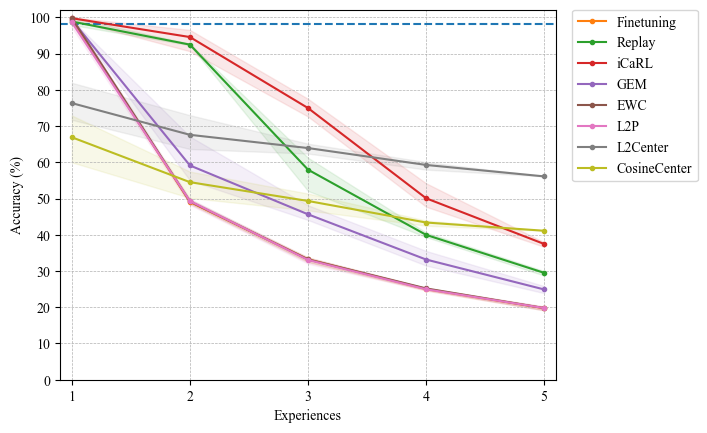

In [ ]:
plt.figure()
ax = plt.gca()
create_line_figure(df_vocalset_singer, ax)
# Configuration
plt.legend(bbox_to_anchor=(1.30, 1.02))
plt.show()

In [8]:
results_path = "../final_results/results_vocalsettech.csv"
df_vocalset_tech = pd.read_csv(results_path)
df_vocalset_tech['scenario'] = df_vocalset_tech.experiment_name.str.split("_").apply(lambda x: x[-1])
df_vocalset_tech.head()

experiment_name experiment_type  \
0  mert95m_base_oracle_vocalsettech_scenario1        Baseline   
1  mert95m_base_oracle_vocalsettech_scenario1        Baseline   
2  mert95m_base_oracle_vocalsettech_scenario1        Baseline   
3  mert95m_base_oracle_vocalsettech_scenario1        Baseline   
4  mert95m_base_oracle_vocalsettech_scenario1        Baseline   

  experiment_subtype train_dataset_name  train_task_number   train_task_name  \
0             Oracle       VocalSetTech                  0  vibrato-straight   
1             Oracle       VocalSetTech                  1      belt-breathy   
2             Oracle       VocalSetTech                  2  lip_trill-spoken   
3             Oracle       VocalSetTech                  3     inhaled-trill   
4             Oracle       VocalSetTech                  4  trillo-vocal_fry   

                                           task_name  Accuracy  F1 Score  \
0                                   vibrato-straight  0.769737  0.224798   
1                      vibrato-straight-belt-breathy  0.734127  0.374618   
2     vibrato-straight-belt-breathy-lip_trill-spoken  0.783172  0.545115   
3  vibrato-straight-belt-breathy-lip_trill-spoken...  0.774373  0.643578   
4  vibrato-straight-belt-breathy-lip_trill-spoken...  0.783908  0.802574   

   Precision    Recall   scenario  
0   0.263083  0.208379  scenario1  
1   0.418976  0.352332  scenario1  
2   0.576126  0.535406  scenario1  
3   0.685396  0.625866  scenario1  
4   0.834550  0.794258  scenario1

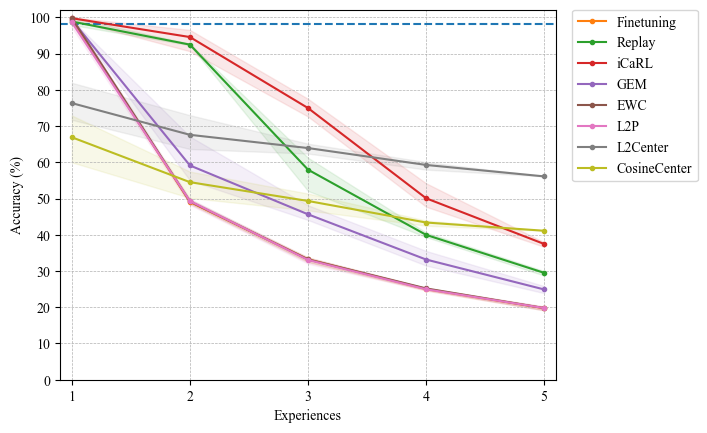

In [ ]:
plt.figure()
ax = plt.gca()
create_line_figure(df_vocalset_singer, ax)
# Configuration
plt.legend(bbox_to_anchor=(1.30, 1.02))
plt.show()

In [9]:
results_path = "../final_results/results_nsynth.csv"
df_nsynth = pd.read_csv(results_path)
df_nsynth['scenario'] = df_nsynth.experiment_name.str.split("_").apply(lambda x: x[-1])
df_nsynth.head()

experiment_name experiment_type  \
0  mert95m_base_oracle_nsynthinstrument_scenario1        Baseline   
1  mert95m_base_oracle_nsynthinstrument_scenario1        Baseline   
2  mert95m_base_oracle_nsynthinstrument_scenario1        Baseline   
3  mert95m_base_oracle_nsynthinstrument_scenario1        Baseline   
4  mert95m_base_oracle_nsynthinstrument_scenario1        Baseline   

  experiment_subtype train_dataset_name  train_task_number  \
0             Oracle   NSynthInstrument                  0   
1             Oracle   NSynthInstrument                  1   
2             Oracle   NSynthInstrument                  2   
3             Oracle   NSynthInstrument                  3   
4             Oracle   NSynthInstrument                  4   

           train_task_name                                          task_name  \
0               bass-brass                                         bass-brass   
1             flute-guitar                            bass-brass-flute-guitar   
2          keyboard-mallet            bass-brass-flute-guitar-keyboard-mallet   
3               organ-reed  bass-brass-flute-guitar-keyboard-mallet-organ-...   
4  string-synth_lead-vocal  bass-brass-flute-guitar-keyboard-mallet-organ-...   

   Accuracy  F1 Score  Precision    Recall   scenario  
0  0.646583  0.646583   0.646583  0.646583  scenario1  
1  0.610597  0.610597   0.610597  0.610597  scenario1  
2  0.606113  0.606113   0.606113  0.606113  scenario1  
3  0.597150  0.597150   0.597150  0.597150  scenario1  
4  0.637207  0.637207   0.637207  0.637207  scenario1

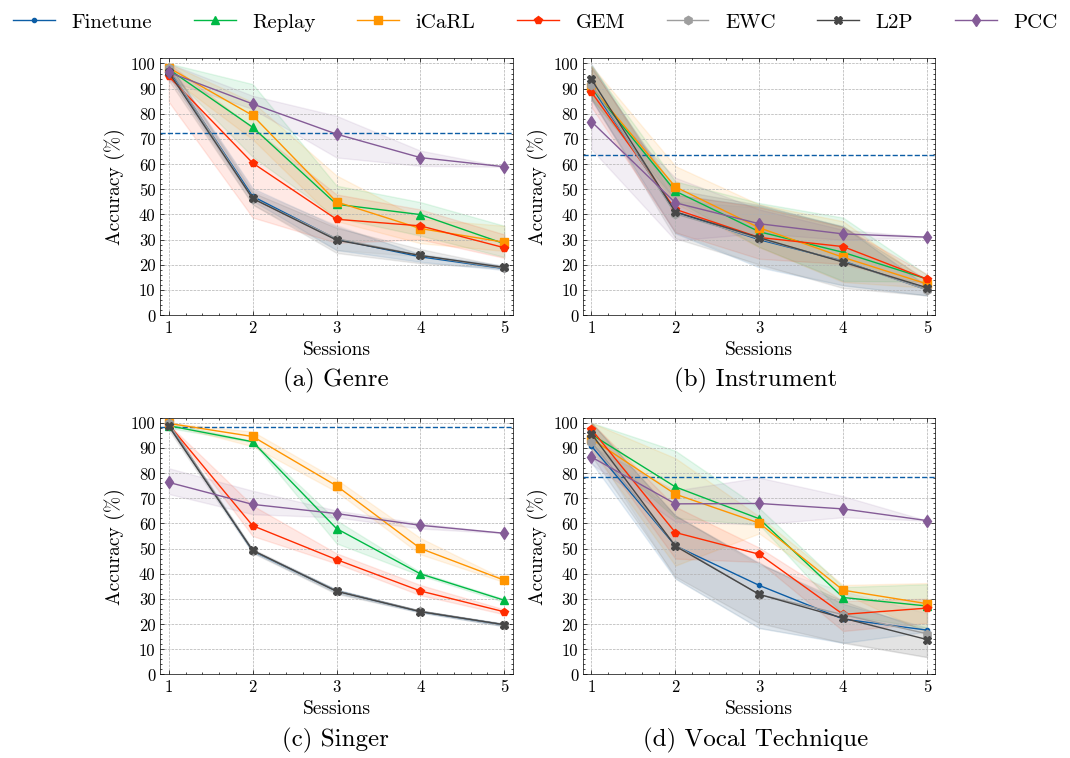

In [76]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(8)
fig.set_figwidth(10)
create_line_figure(df_gtzan, ax1, "(a) Genre", position=[0.30, 0.47])
create_line_figure(df_nsynth, ax2, "(b) Instrument", position=[0.72, 0.47])
create_line_figure(df_vocalset_singer, ax3, "(c) Singer", position=[0.30, 0.02])
create_line_figure(df_vocalset_tech, ax4, "(d) Vocal Technique", position=[0.72, 0.02])
plt.subplots_adjust(hspace=0.4)
plt.legend(bbox_to_anchor=(1.4, 2.65), ncols=7, fontsize=15)
# plt.legend(bbox_to_anchor=(1.50, 2.45), ncols=1, fontsize=15)
plt.savefig("acc_vs_exp.pdf", bbox_inches="tight", dpi=600)

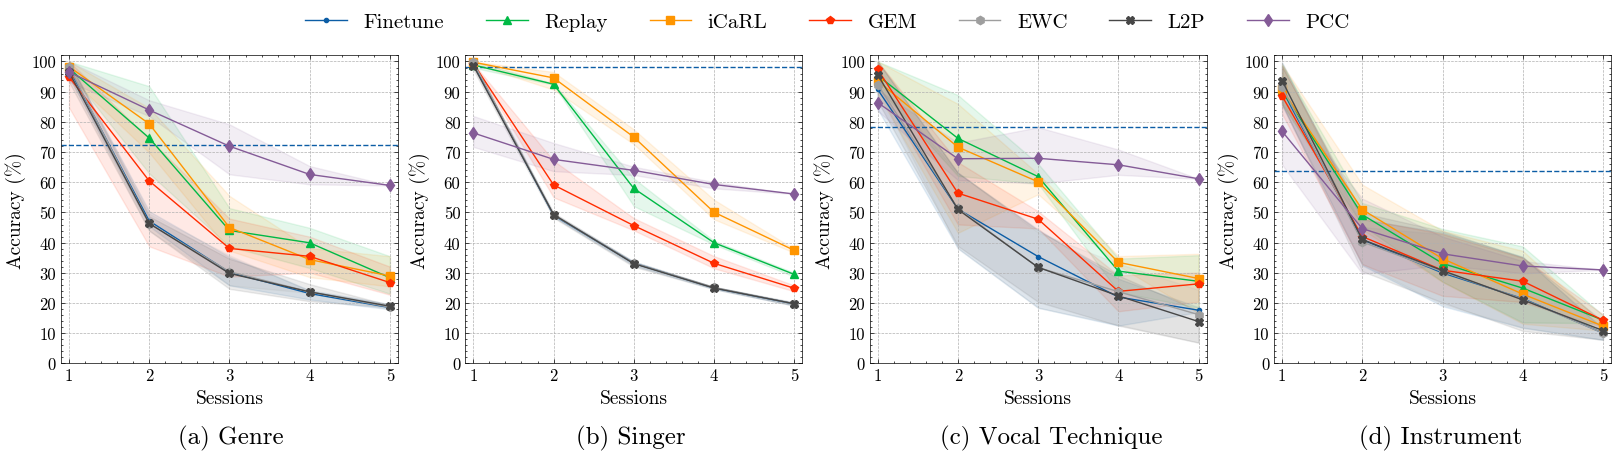

In [57]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_figheight(4)
fig.set_figwidth(20)
create_line_figure(df_gtzan, ax1, "(a) Genre", (0.21, -0.09))
create_line_figure(df_vocalset_singer, ax2, "(b) Singer", (0.41, -0.09))
create_line_figure(df_vocalset_tech, ax3, "(c) Vocal Technique", (0.62, -0.09))
create_line_figure(df_nsynth, ax4, "(d) Instrument", (0.815, -0.09))
plt.legend(bbox_to_anchor=(0.28, 1.2), ncols=7, fontsize=15)
plt.savefig("acc_vs_exp.pdf", bbox_inches="tight", dpi=600)

In [5]:
fig = go.Figure()

cl_df = df[df.experiment_type == "CL"]
cl_df = cl_df[cl_df.train_dataset_name == "GTZAN"]
cl_df = cl_df[cl_df.experiment_name.str.contains("scenario1")]
for experiment_subtype in cl_df.experiment_subtype.unique():
    fig.add_trace(
        go.Scatter(
            x=cl_df[cl_df.experiment_subtype == experiment_subtype]["train_task_name"],
            y=cl_df[cl_df.experiment_subtype == experiment_subtype]["Accuracy"] * 100,
            mode="lines",
            name=experiment_subtype,
        )
    )

oracle_df = df[df.experiment_subtype == "Oracle"]
fig.add_trace(
    go.Scatter(
        x=["hiphop-jazz"],
        y=oracle_df["Accuracy"] * 100,
        mode="markers",
        name="Oracle",
        marker=dict(size=10),
        marker_symbol="star",
    )
)

fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=10, r=10, t=30, b=10),
    yaxis_title="Accuracy (%)",
    font=dict(family="Open Sans", size=16),
    yaxis1=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis2=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis3=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis4=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
)
fig.update_yaxes(gridwidth=1, gridcolor="lightgrey")
fig.update_xaxes(tickangle=-45, tickfont=dict(size=20))
fig.update_annotations(font_size=20)
iplot(fig)

In [6]:
fig = go.Figure()

cl_df = df[df.experiment_type == "CL"]
cl_df = cl_df[cl_df.train_dataset_name == "GTZAN"]
cl_df = cl_df[cl_df.experiment_name.str.contains("scenario2")]
for experiment_subtype in cl_df.experiment_subtype.unique():
    fig.add_trace(
        go.Scatter(
            x=cl_df[cl_df.experiment_subtype == experiment_subtype]["train_task_name"],
            y=cl_df[cl_df.experiment_subtype == experiment_subtype]["Accuracy"] * 100,
            mode="lines",
            name=experiment_subtype,
        )
    )

oracle_df = df[df.experiment_subtype == "Oracle"]
fig.add_trace(
    go.Scatter(
        x=["pop-disco"],
        y=oracle_df["Accuracy"] * 100,
        mode="markers",
        name="Oracle",
        marker=dict(size=10),
        marker_symbol="star",
    )
)

fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=10, r=10, t=30, b=10),
    yaxis_title="Accuracy (%)",
    font=dict(family="Open Sans", size=16),
    yaxis1=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis2=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis3=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis4=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
)
fig.update_yaxes(gridwidth=1, gridcolor="lightgrey")
fig.update_xaxes(tickangle=-45, tickfont=dict(size=20))
fig.update_annotations(font_size=20)
iplot(fig)

In [7]:
fig = go.Figure()

cl_df_vocalsettech = df[df.experiment_type == "CL"]
cl_df_vocalsettech = cl_df_vocalsettech[cl_df_vocalsettech.train_dataset_name == "VocalSetTech"]
cl_df_vocalsettech = cl_df_vocalsettech[cl_df_vocalsettech.experiment_name.str.contains("scenario2")]
for experiment_subtype in cl_df_vocalsettech.experiment_subtype.unique():
    fig.add_trace(
        go.Scatter(
            x=cl_df_vocalsettech[cl_df_vocalsettech.experiment_subtype == experiment_subtype]["train_task_name"],
            y=cl_df_vocalsettech[cl_df_vocalsettech.experiment_subtype == experiment_subtype]["Accuracy"] * 100,
            mode="lines",
            name=experiment_subtype,
        )
    )

oracle_df = df[df.experiment_subtype == "Oracle"]
oracle_df = oracle_df[oracle_df.train_dataset_name == "VocalSetTech"]
fig.add_trace(
    go.Scatter(
        x=["spoken-trillo"],
        y=oracle_df["Accuracy"] * 100,
        mode="markers",
        name="Oracle",
        marker=dict(size=10),
        marker_symbol="star",
    )
)

fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=10, r=10, t=30, b=10),
    yaxis_title="Accuracy (%)",
    font=dict(family="Open Sans", size=16),
    yaxis1=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis2=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis3=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis4=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
)
fig.update_yaxes(gridwidth=1, gridcolor="lightgrey")
fig.update_xaxes(tickangle=-45, tickfont=dict(size=20))
fig.update_annotations(font_size=20)
iplot(fig)

In [8]:
fig = go.Figure()

cl_df = df[df.experiment_type == "CL"]
cl_df = cl_df[cl_df.train_dataset_name == "VocalSetSinger"]
cl_df = cl_df[cl_df.experiment_name.str.contains("scenario2")]
for experiment_subtype in cl_df.experiment_subtype.unique():
    fig.add_trace(
        go.Scatter(
            x=cl_df[cl_df.experiment_subtype == experiment_subtype]["train_task_name"],
            y=cl_df[cl_df.experiment_subtype == experiment_subtype]["Accuracy"] * 100,
            mode="lines",
            name=experiment_subtype,
        )
    )

oracle_df = df[df.experiment_subtype == "Oracle"]
fig.add_trace(
    go.Scatter(
        x=["male10-female4-male5-male11"],
        y=oracle_df["Accuracy"] * 100,
        mode="markers",
        name="Oracle",
        marker=dict(size=10),
        marker_symbol="star",
    )
)

fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=10, r=10, t=30, b=10),
    yaxis_title="Accuracy (%)",
    font=dict(family="Open Sans", size=16),
    yaxis1=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis2=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis3=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis4=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
)
fig.update_yaxes(gridwidth=1, gridcolor="lightgrey")
fig.update_xaxes(tickangle=-45, tickfont=dict(size=20))
fig.update_annotations(font_size=20)
iplot(fig)

In [10]:
fig = go.Figure()

cl_df = df[df.experiment_type == "CL"]
cl_df = cl_df[cl_df.train_dataset_name == "GTZAN"]
cl_df = cl_df[cl_df.experiment_name.str.contains("scenario3")]
for experiment_subtype in cl_df.experiment_subtype.unique():
    fig.add_trace(
        go.Scatter(
            x=cl_df[cl_df.experiment_subtype == experiment_subtype]["train_task_name"],
            y=cl_df[cl_df.experiment_subtype == experiment_subtype]["Accuracy"] * 100,
            mode="lines",
            name=experiment_subtype,
        )
    )

oracle_df = df[df.experiment_subtype == "Oracle"]
fig.add_trace(
    go.Scatter(
        x=["country-jazz"],
        y=oracle_df["Accuracy"] * 100,
        mode="markers",
        name="Oracle",
        marker=dict(size=10),
        marker_symbol="star",
    )
)

fig.update_layout(
    width=1000,
    height=600,
    margin=dict(l=10, r=10, t=30, b=10),
    yaxis_title="Accuracy (%)",
    font=dict(family="Open Sans", size=16),
    yaxis1=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis2=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis3=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
    yaxis4=dict(
        tickmode="array",
        tickvals=[0, 20, 40, 60, 80, 100],
    ),
)
fig.update_yaxes(gridwidth=1, gridcolor="lightgrey")
fig.update_xaxes(tickangle=-45, tickfont=dict(size=20))
fig.update_annotations(font_size=20)
iplot(fig)